<a href="https://colab.research.google.com/github/m-bashari-m/vehicle-color-recognition/blob/main/src/6_best_model_and_analyze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!wget https://raw.githubusercontent.com/m-bashari-m/vehicle-color-recognition/main/src/utils.py

--2022-06-08 18:30:56--  https://raw.githubusercontent.com/m-bashari-m/vehicle-color-recognition/main/src/utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11779 (12K) [text/plain]
Saving to: ‘utils.py.1’

utils.py.1          100%[===================>]  11.50K  --.-KB/s    in 0s      

2022-06-08 18:30:57 (63.8 MB/s) - ‘utils.py.1’ saved [11779/11779]



In [2]:
from google.colab import drive
drive.mount('./drive')

Mounted at ./drive


In [3]:
import pandas as pd
import numpy as np
import os

import tensorflow as tf
from tensorflow import keras

!pip install -q tensorflow-io
import tensorflow_io as tfio

from utils import get_train_val_ds, ErrorAnalyzer, get_class_weight, get_model

In [4]:
BATCH_SIZE = 64
IMG_SIZE = (256, 256)
AUTOTUNE = tf.data.AUTOTUNE
N_CLASSES = 16

In [5]:
dataset_dir = os.path.join('drive', 'MyDrive', 'cars')
train_dir = os.path.join(dataset_dir, 'train')
val_dir = os.path.join(dataset_dir, 'val')

In [6]:
_, val_ds = get_train_val_ds(train_dir, val_dir, batch_size=BATCH_SIZE, img_size=IMG_SIZE)

Found 17043 files belonging to 16 classes.
Found 3495 files belonging to 16 classes.


In [ ]:
def combine_rgb_xyz(img_batch):
  img_batch_xyz = tfio.experimental.color.rgb_to_xyz(img_batch)
  return (img_batch + img_batch_xyz) / 2

In [ ]:
rgb_ds = (
    val_ds.
    map(lambda img, lbl: (img/255., lbl), num_parallel_calls=AUTOTUNE).
    prefetch(AUTOTUNE))

In [ ]:
xyz_ds = (
    val_ds.
    map(lambda img, lbl: (img/255., lbl), num_parallel_calls=AUTOTUNE).
    map(lambda img, lbl: (tfio.experimental.color.rgb_to_xyz(img), lbl), num_parallel_calls=AUTOTUNE).
    prefetch(AUTOTUNE))

In [ ]:
hsv_ds = (
    val_ds.
    map(lambda img, lbl: (img/255., lbl), num_parallel_calls=AUTOTUNE).
    map(lambda img, lbl: (tf.image.rgb_to_hsv(img), lbl), num_parallel_calls=AUTOTUNE).
    prefetch(AUTOTUNE))

In [ ]:
rgb_xyz_ds = (
    val_ds.
    map(lambda img, lbl: (img/255., lbl), num_parallel_calls=AUTOTUNE).
    map(lambda img, lbl: (combine_rgb_xyz(img), lbl), num_parallel_calls=AUTOTUNE).
    prefetch(AUTOTUNE))

In [7]:
classes, _ = get_class_weight()

# RGB models

## Epoch

### #25

In [13]:
rgb_25 = get_model('rgb-model-25.h5')

rgb_analyzer_25 = ErrorAnalyzer(model=rgb_25,
                         model_name='RGB-25',
                         ds=val_ds,
                         classes=classes)

Making confusion matrix:


  0%|          | 0/55 [00:00<?, ?it/s]

Confusion matrix is saved


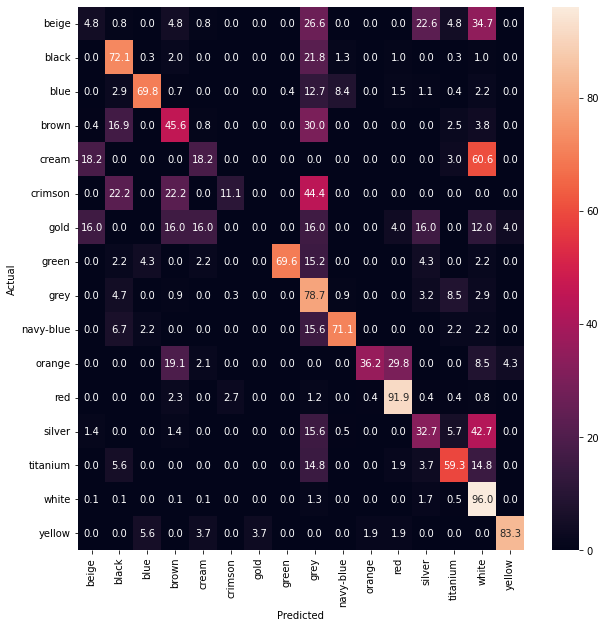

Calculateing error types...
Writing in log file...
All done. Check log file => RGB-25.csv
Accuracy: %75.57000000000001
Precision mean: 0.5949375
Recall mean: 0.52525


In [14]:
rgb_analyzer_25.plot_confusion_mat()
rgb_analyzer_25.evaluate_model()

### #40

In [15]:
rgb_40 = get_model('rgb-model-40.h5')

rgb_analyzer_40 = ErrorAnalyzer(model=rgb_40,
                         model_name='RGB-40',
                         ds=val_ds,
                         classes=classes)

Making confusion matrix:


  0%|          | 0/55 [00:00<?, ?it/s]

Confusion matrix is saved


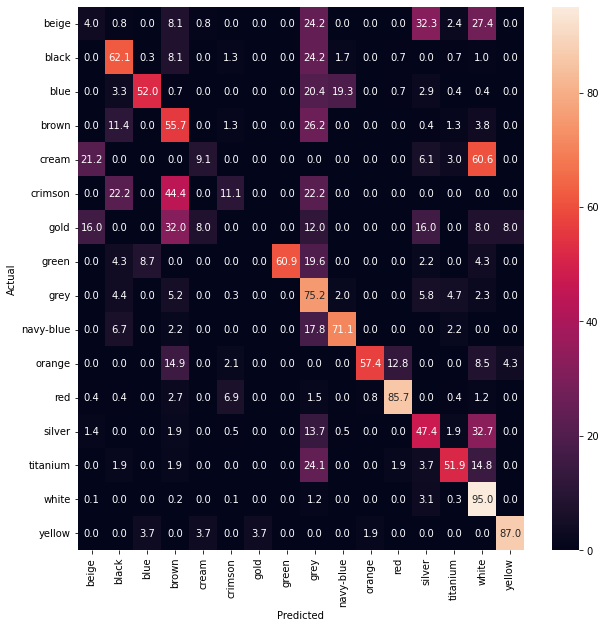

Calculateing error types...
Writing in log file...
All done. Check log file => RGB-40.csv
Accuracy: %73.65
Precision mean: 0.5800000000000001
Recall mean: 0.516


In [16]:
rgb_analyzer_40.plot_confusion_mat()
rgb_analyzer_40.evaluate_model()

### #50

In [17]:
rgb_50 = get_model('rgb-model-50.h5')

rgb_analyzer_50 = ErrorAnalyzer(model=rgb_50,
                         model_name='RGB-50',
                         ds=val_ds,
                         classes=classes)

Making confusion matrix:


  0%|          | 0/55 [00:00<?, ?it/s]

Confusion matrix is saved


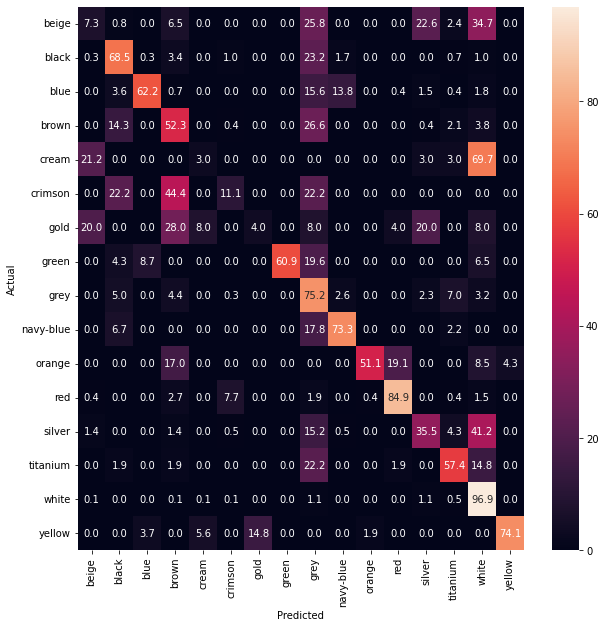

Calculateing error types...
Writing in log file...
All done. Check log file => RGB-50.csv
Accuracy: %74.68
Precision mean: 0.588875
Recall mean: 0.5110625000000001


In [18]:
rgb_analyzer_50.plot_confusion_mat()
rgb_analyzer_50.evaluate_model()

### #60

In [19]:
rgb_60 = get_model('rgb-model-60.h5')

rgb_analyzer_60 = ErrorAnalyzer(model=rgb_60,
                         model_name='RGB-60',
                         ds=val_ds,
                         classes=classes)

Making confusion matrix:


  0%|          | 0/55 [00:00<?, ?it/s]

Confusion matrix is saved


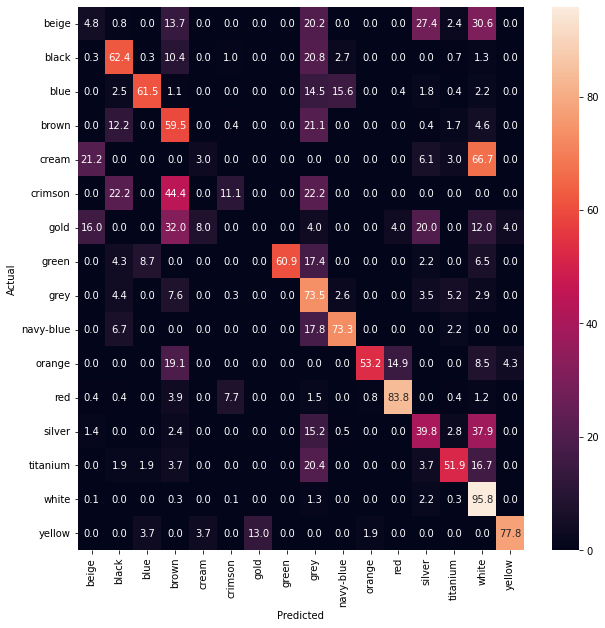

Calculateing error types...
Writing in log file...
All done. Check log file => RGB-60.csv
Accuracy: %74.05000000000001
Precision mean: 0.57075
Recall mean: 0.5076875


In [20]:
rgb_analyzer_60.plot_confusion_mat()
rgb_analyzer_60.evaluate_model()

# XYZ model

## Epoch

### #25

In [21]:
xyz_25 = get_model('xyz-model-25.h5')

xyz_analyzer_25 = ErrorAnalyzer(model=xyz_25,
                         model_name='XYZ-25',
                         ds=val_ds,
                         classes=classes)

Making confusion matrix:


  0%|          | 0/55 [00:00<?, ?it/s]

Confusion matrix is saved


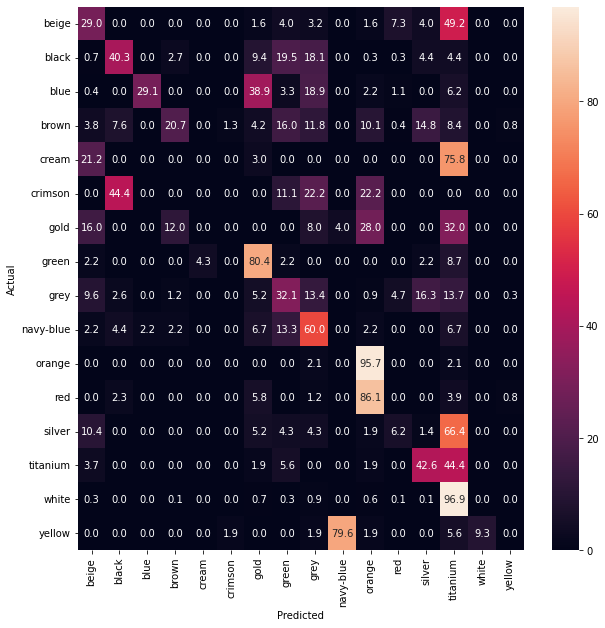

Calculateing error types...
Writing in log file...
All done. Check log file => XYZ-25.csv
Accuracy: %11.559999999999999
Precision mean: 0.19656249999999997
Recall mean: 0.17262499999999997


In [22]:
xyz_analyzer_25.plot_confusion_mat()
xyz_analyzer_25.evaluate_model()

### #40

In [ ]:
xyz_40 = get_model('xyz-model-40.h5')

xyz_analyzer_40 = ErrorAnalyzer(model=xyz_40,
                         model_name='XYZ-40',
                         ds=val_ds,
                         classes=classes)

Making confusion matrix:


  0%|          | 0/55 [00:00<?, ?it/s]

In [ ]:
xyz_analyzer_40.plot_confusion_mat()
xyz_analyzer_40.evaluate_model()

### #55

In [ ]:
xyz_55 = get_model('xyz-model-55.h5')

xyz_analyzer_55 = ErrorAnalyzer(model=xyz_55,
                         model_name='XYZ-55',
                         ds=val_ds,
                         classes=classes)

In [ ]:
xyz_analyzer_55.plot_confusion_mat()
xyz_analyzer_55.evaluate_model()

### #65

In [ ]:
xyz_65 = get_model('xyz-model-65.h5')

xyz_analyzer_65 = ErrorAnalyzer(model=xyz_65,
                         model_name='XYZ-65',
                         ds=val_ds,
                         classes=classes)

In [ ]:
xyz_analyzer_65.plot_confusion_mat()
xyz_analyzer_65.evaluate_model()

# HSV models

# RGB-XYZ  models